# Simple Outdoors Test

## Objective

After evaluating the basic distance measuring capabilities of the TOF sensor, the objective of this notebook is to determine the sensor's effectiveness in detecting and measuring the distances of passing cars in a practical setting.

## Overview

- First, I started off by mounting the sensor on a stationary bike, and positioning it along a road to measure passing cars. I first wanted to determine the effectiveness of the sensor at detecting pass cars in a more controlled environment.
- Next, with the same set up, the bike was pedalled down different roads and the data from overtaking cars was collected. Being able consistently and reliably detect vehicles in this setting was the end goal of the experiment.

### Code

- As per the previous notebook, much of the code has been split into separate Python modules.
- [`data_loader`](./data_loader.py) contains helper functions to extract the data from the necessary files.
- [`preprocessing`](./preprocessing.py) contains utility functions that manipulate the data.

In [15]:
import pathlib

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display

from data_loader import get_data_from_txt
from outdoors_graphing import PlotOutdoorGraphs
from preprocessing import clean_spurious_data

ImportError: cannot import name 'remove_null_points' from 'preprocessing' (c:\Users\wuihee\Desktop\Programming\Projects\Bike Sensor\Traffic-Data-Collection\data_analysis\preprocessing.py)

## Stationary Test

- In the first test, the sensor was mounted on a stationary bike along Corporation Rd. which saw moderate traffic.
- I also mounted a GoPro to capture a video of the vehicles that pass the bike.
- I will proceed to extract and analyze the data collected from the TOF sensor, and compare it to the video feed to determine its reliability.

### Setup

- First, I create a graphs objects to help plot the graphs I want.
- Then, I extract the data into three lists: times, distances measured, and signal strength.

In [ ]:
graphs = PlotOutdoorGraphs()

In [ ]:
STATIONARY_TEST_PATH = pathlib.Path("./data/outdoor_tests/stationary_test.txt")

stationary_raw_data = get_data_from_txt(STATIONARY_TEST_PATH)
timing, distances, strength = stationary_raw_data
cleaned_distances = clean_spurious_data(distances)

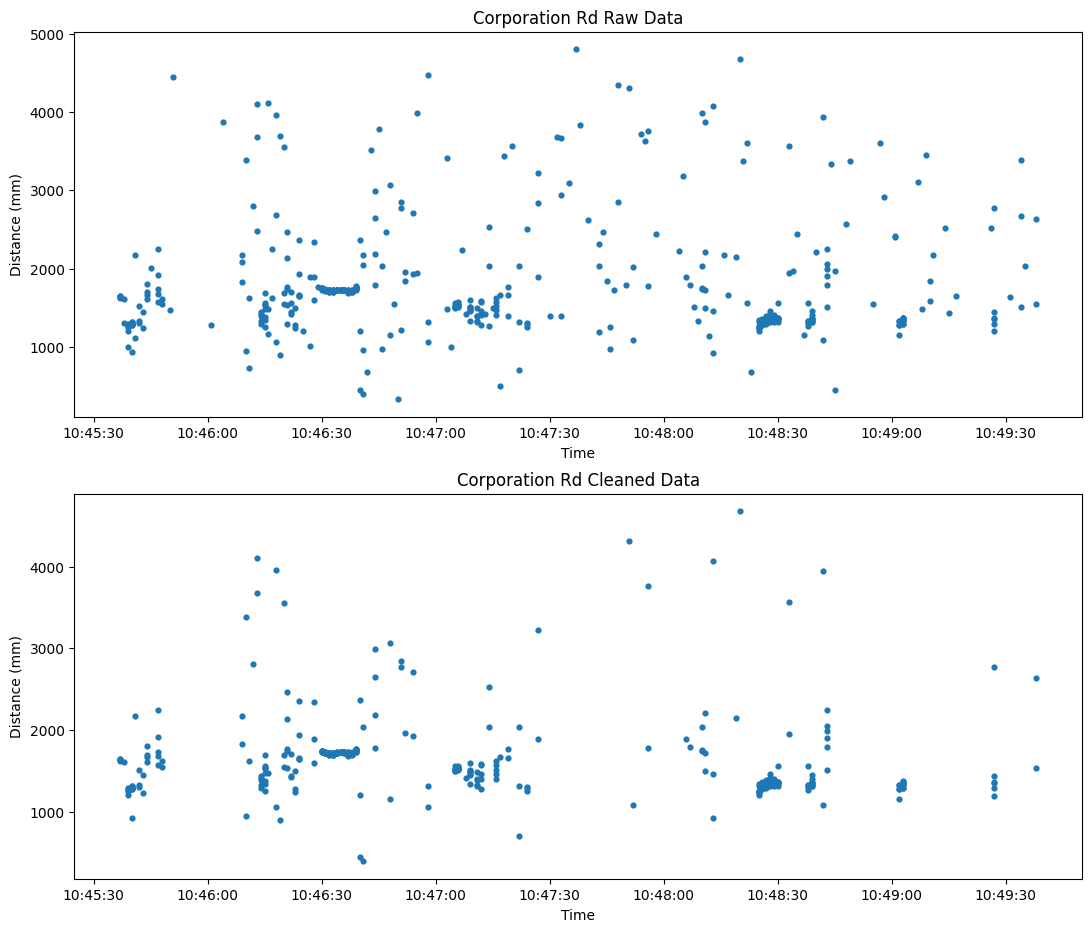

In [ ]:
fig, axes = plt.subplots(2, figsize=(13, 11))
graphs.scatter_time_vs_distance(axes[0], timing, distances, title="Corporation Rd Raw Data")
graphs.scatter_time_vs_distance(axes[1], timing, cleaned_distances, title="Corporation Rd Cleaned Data")